In [1]:
import numpy as np
from Params import *
from FBclass import FB
import matplotlib.pyplot as plt
# from model import *

### Task D: 1 day

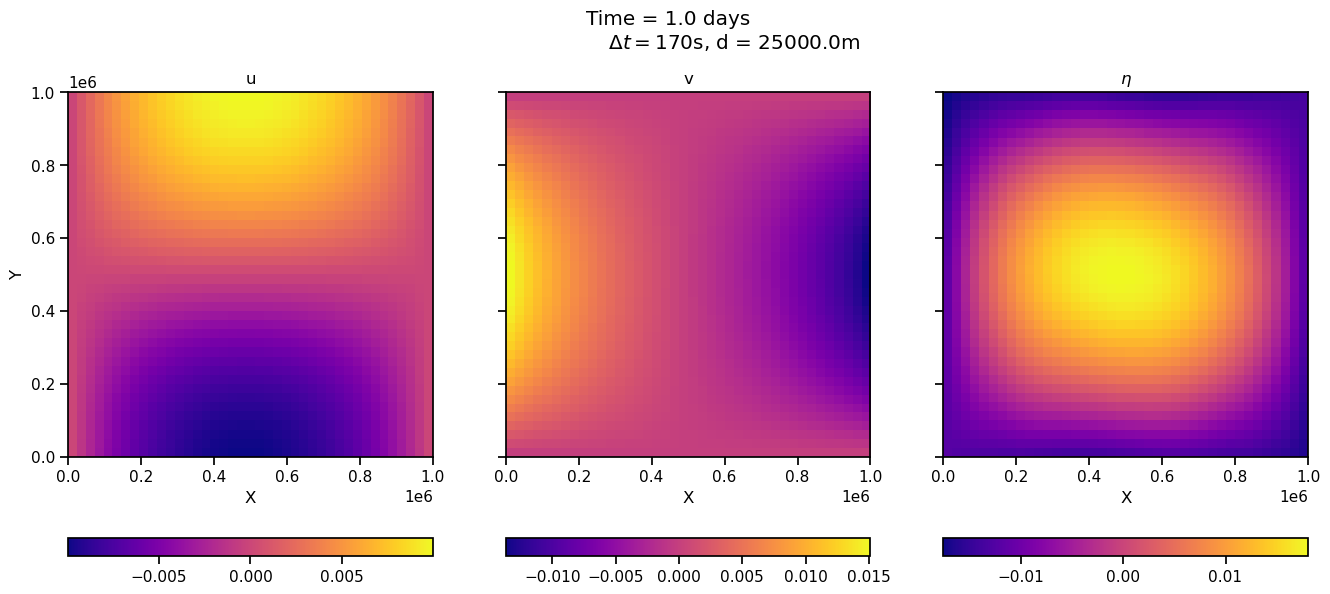

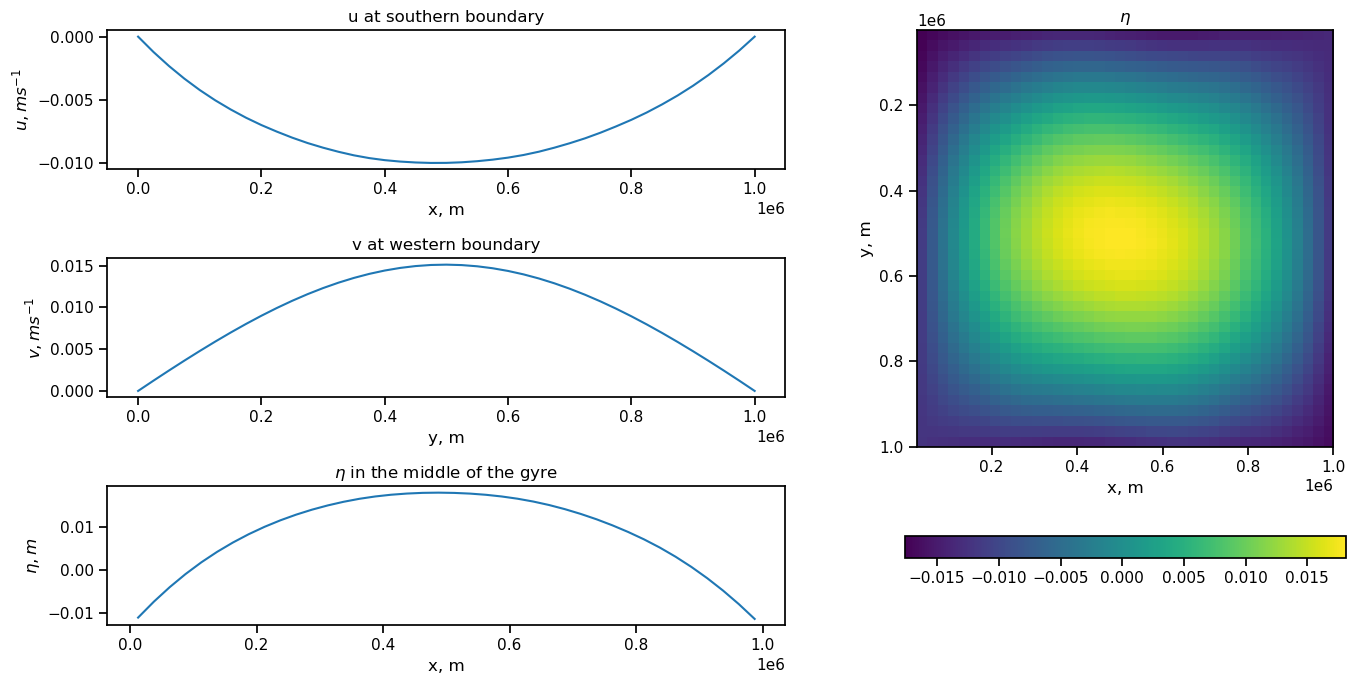

In [2]:
L = 1e6
d = 25e3
n = int(L/d)
dt = 170
endtime = day
nt = int(endtime/dt)

sim = FB(L, d, dt, nt)
sim.run()
sim.plot_uva()
sim.plot_1d()

### Task D/E: Steady State

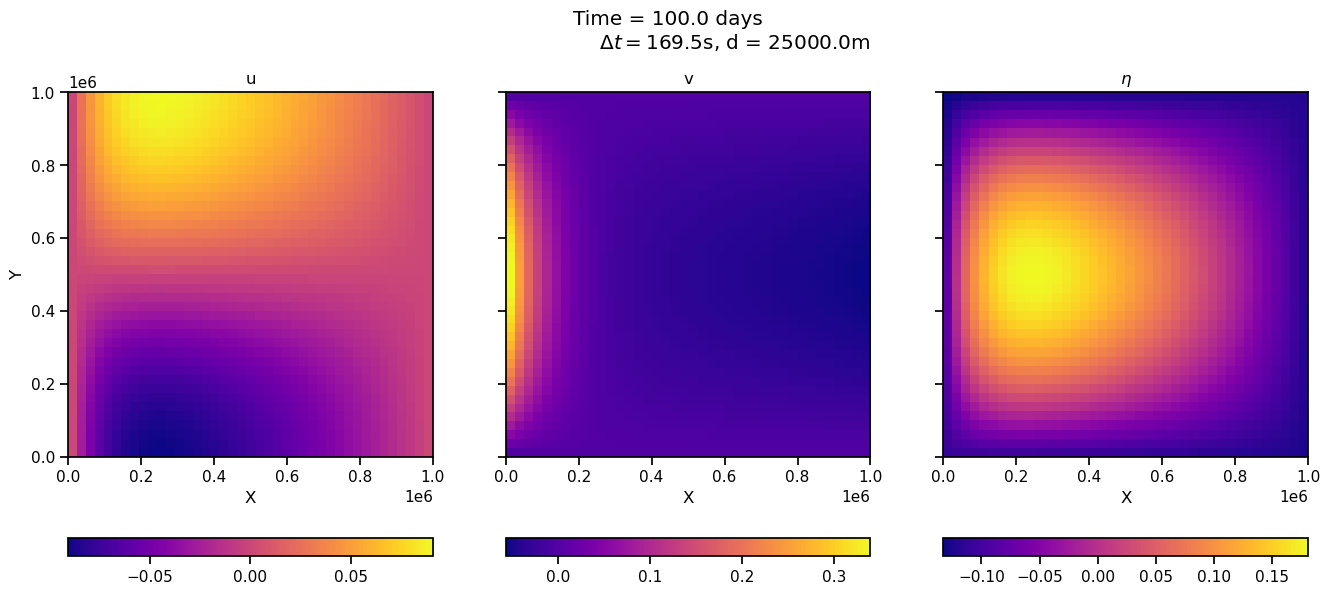

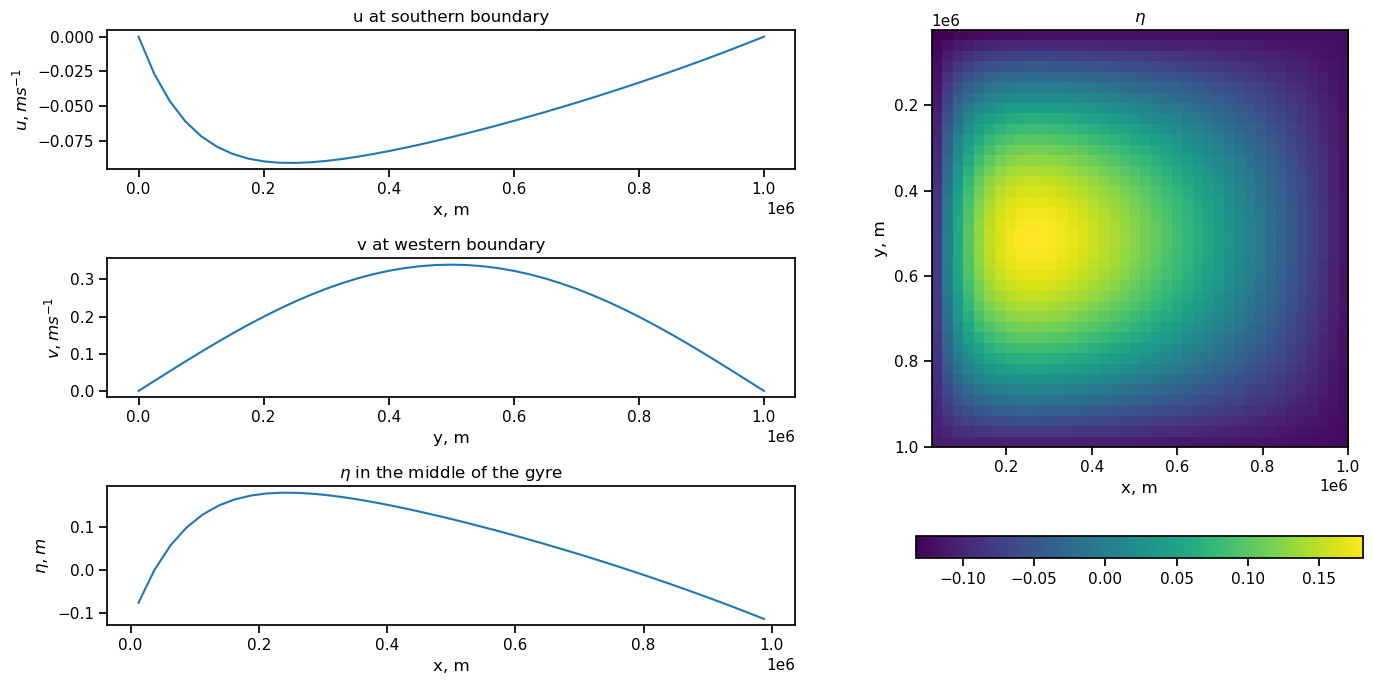

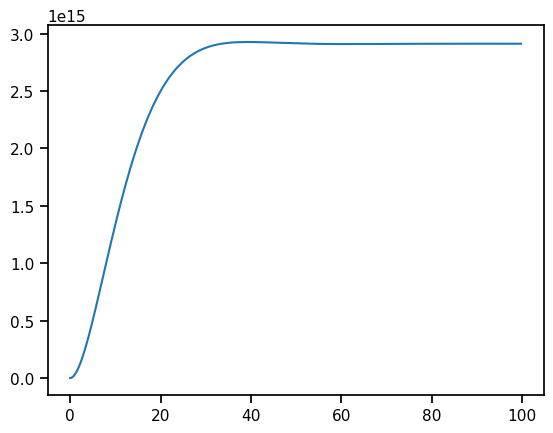

In [3]:
endtime = 100*day
nt = int(endtime/dt-0.5)

long = FB(L, d, dt-0.5, nt, energy = True)
long.run()
long.plot_uva()
long.plot_1d()
long.plot_energy()

### Task D3: Differences between steady state and analytical model

Difference in Energy is 7.361888589492762e+25J, which is 21297.61132677465% of the analytical solution


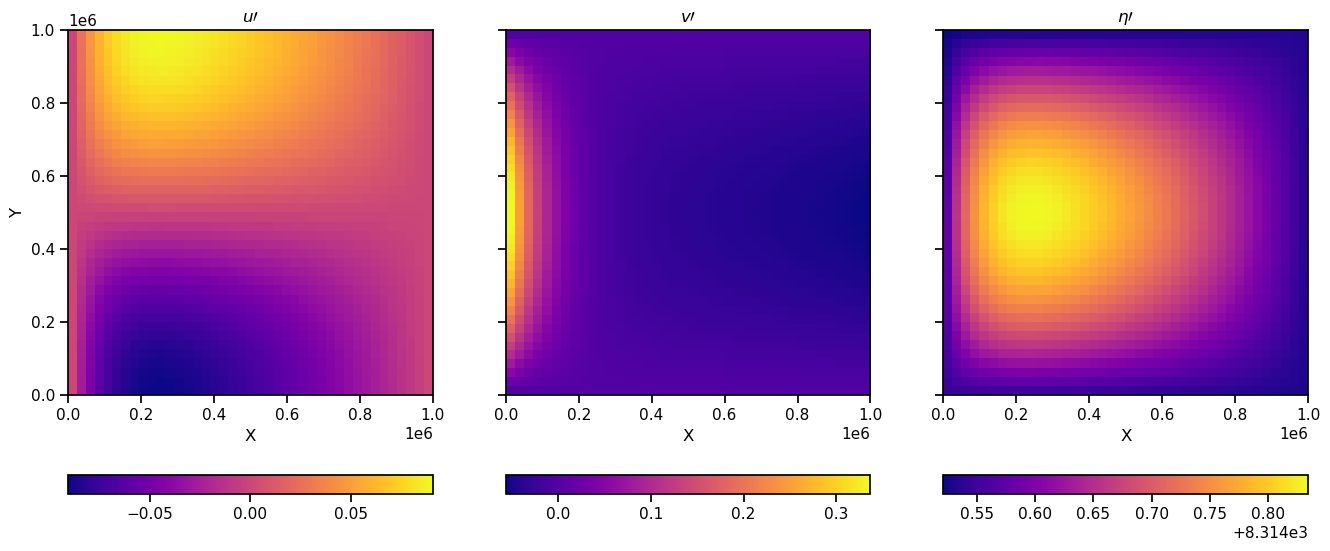

In [5]:
from Analytical import *
from functions import *
endtime = 50*day
nt = int(endtime/dt)
ss = FB(L, d, dt, nt, energy = True)
ss.run()
eta0 = ss.eta0()

x_v, y_v = np.meshgrid(ss.x_v1d, ss.y_v1d)
x_u, y_u = np.meshgrid(ss.x_u1d, ss.y_u1d)
x_eta, y_eta = np.meshgrid(ss.x_v1d, ss.y_u1d)

a, b = calc_ab(L)
U = u_ss(x_u, y_u, L, a, b)
V = v_ss(x_v, y_v, L, a, b)
ETA = eta_ss(x_eta, y_eta, L, a, b, eta0 = eta0)

udiff, vdiff, etadiff = ss.u-U, ss.v-V, ETA-ss.eta

Ediff = calc_energy(udiff, vdiff, etadiff, ss.d)
print(f'Difference in Energy is {Ediff}J, which is {Ediff/calc_energy(U, V, ETA, ss.d)*100}% of the analytical solution')

labels = ['$u\prime$', '$v\prime$', '$\eta\prime$']
# data = [U-ss.u, V-ss.v, ETA-ss.eta]
data = [U, V, ETA]

fig, axs = plt.subplots(1, 3, figsize = (16, 7), sharey = True)
extent = [0, L, 0, L]
axs[0].set_ylabel('Y')

for i in range(3):
    axs[i].set_title(labels[i])
    axs[i].set_xlabel('X')
    plot = axs[i].imshow(data[i], extent = extent, cmap = 'plasma')
    plt.colorbar(plot, location = 'bottom', ax= axs[i])

In [7]:
ss2 = FB(L, d/2, dt/2, int(nt*2))
ss2.run()
eta0 = ss2.eta0()

x_v, y_v = np.meshgrid(ss2.x_v1d, ss2.y_v1d)
x_u, y_u = np.meshgrid(ss2.x_u1d, ss2.y_u1d)
x_eta, y_eta = np.meshgrid(ss2.x_v1d, ss2.y_u1d)

U = u_ss(x_u, y_u, L, a, b)
V = v_ss(x_v, y_v, L, a, b)
ETA = eta_ss(x_eta, y_eta, L, a, b, eta0 = eta0)

udiff, vdiff, etadiff = ss2.u-U, ss2.v-V, ss2.eta-ETA

Ediff = calc_energy(udiff, vdiff, etadiff, ss2.d)
print(f'Difference in Energy is {Ediff}J, which is {Ediff/calc_energy(U, V, ETA, ss2.d)*100}%')

Difference in Energy is 1048704121509470.0J, which is 35.012708072482%


10000.0 64.0
15000.0 96.0
20000.0 128.0
25000.0 160.0


Text(0.5, 0, 'd, km')

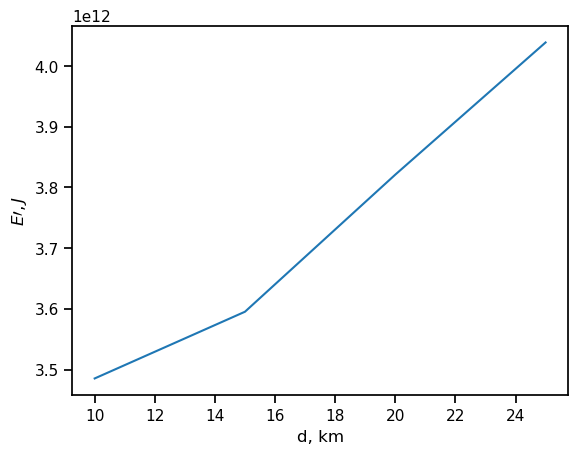

In [8]:
endtime = 40*day
d0, dt0 = 25e3, 160
ratio = dt0/d0
Es = []
for d in [10e3, 15e3, 20e3, 25e3]:
    dt = ratio*d
    print(d, dt)
    nt = int(endtime/dt)
    varyd = FB(L, d, dt, nt)
    varyd.run()
    eta0 = varyd.eta0()

    x_v, y_v = np.meshgrid(varyd.x_v1d, varyd.y_v1d)
    x_u, y_u = np.meshgrid(varyd.x_u1d, varyd.y_u1d)
    x_eta, y_eta = np.meshgrid(varyd.x_v1d, varyd.y_u1d)

    U = u_ss(x_u, y_u, L, a, b)
    V = v_ss(x_v, y_v, L, a, b)
    ETA = eta_ss(x_eta, y_eta, L, a, b, eta0 = eta0)

    udiff, vdiff, etadiff = varyd.u-U, varyd.v-V, varyd.eta-ETA

    Ediff = calc_energy(udiff, vdiff, etadiff, varyd.d)
    Es.append(Ediff)
plt.plot(np.array([10, 15, 20, 25]), Es)
plt.ylabel('$E\prime, J$')
plt.xlabel('d, km')